### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



### **Análisis totales de ventas por tienda**

In [4]:
import matplotlib.pyplot as plt

total_ventas_tienda = tienda.Precio.sum()
total_ventas_tienda2 = tienda2.Precio.sum()
total_ventas_tienda3 = tienda3.Precio.sum()
total_ventas_tienda4 = tienda4.Precio.sum()

numero_ventas_tienda = tienda.Precio.count()
numero_ventas_tienda2 = tienda2.Precio.count()
numero_ventas_tienda3 = tienda3.Precio.count()
numero_ventas_tienda4 = tienda4.Precio.count()

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ventas_totales = [total_ventas_tienda,total_ventas_tienda2,total_ventas_tienda3,total_ventas_tienda4]
total_numero_ventas = [numero_ventas_tienda, numero_ventas_tienda2, numero_ventas_tienda3, numero_ventas_tienda4]


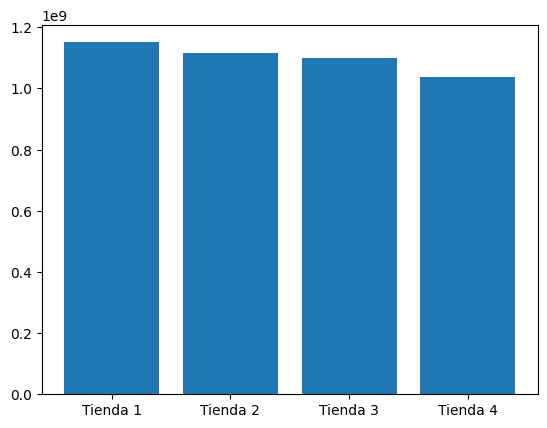

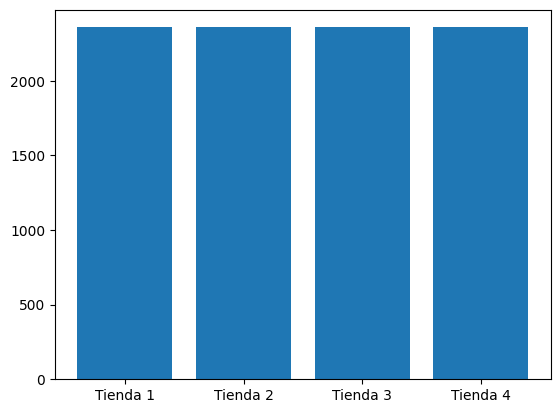

In [5]:
plt.figure(1)
plt.bar(tiendas, ventas_totales)
plt.figure(2)
plt.bar(tiendas,total_numero_ventas)
plt.show()

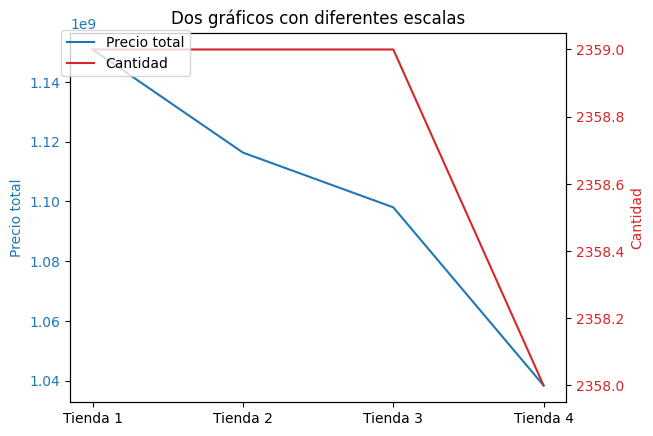

In [6]:
# CRear la figura
fig, ax1 = plt.subplots()
ax1.plot(tiendas, ventas_totales, 'tab:blue', label='Precio total')
ax1.set_ylabel('Precio total', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# Crear un segundo eje que comparte el eje X (eje secundario)
ax2 = ax1.twinx()

# Graficar los datos en el eje secundario
ax2.plot(tiendas, total_numero_ventas, 'tab:red', label='Cantidad')
ax2.set_ylabel('Cantidad', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Añadir título y leyenda
plt.title('Dos gráficos con diferentes escalas')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Mostrar el gráfico
plt.show()

Rango de fechas de ventas. Esto para anlizar cual tenda vendió mas en un mismo rango de fechas

In [7]:
from datetime import datetime
import numpy as np

fechas_tienda = tienda4['Fecha de Compra']

# 1. Convertir la Serie de fechas (strings) a objetos datetime
# Esto es esencial para manipular las fechas correctamente.
fechas_dt = pd.to_datetime(fechas_tienda, format='%d/%m/%Y')
# 2. Formatear la fecha a "mm/yyyy" y crear una nueva Serie
# La función strftime se usa para formatear objetos datetime.
fechas_mes_anio = fechas_dt.dt.strftime('%m/%Y')
# 3. Obtener un array (numpy array) con los valores únicos
# .unique() devuelve los valores únicos de la Serie.
# .to_numpy() convierte la Serie de resultados a un array de NumPy.
array_meses_unicos = fechas_mes_anio.unique()

len(array_meses_unicos)

39

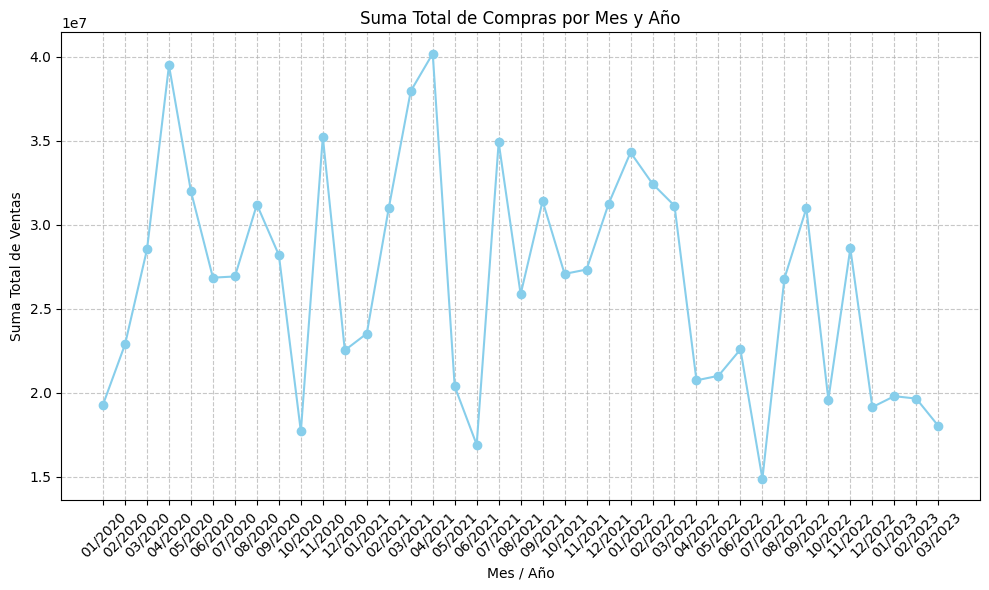

In [8]:
################# Agrupación de ventas por mes
import pandas as pd
import numpy as np

# --- 1. Preparación de Datos (Asegurarse de que el formato es correcto) ---

# Convertir la columna 'Precio' a tipo numérico (float/int)
# Esto es vital para poder usar .sum(). El parámetro errors='coerce'
# convierte a NaN cualquier valor que no sea un número.
tienda4['Precio_Numerico'] = pd.to_numeric(tienda4['Precio'], errors='coerce')

# Convertir la columna 'Fecha de Compra' (dd/mm/yyyy) a formato datetime
# Se usa el formato explícito para evitar errores de interpretación (día/mes/año).
tienda4['Fecha_dt'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')

# Crear la columna de agrupación 'Mes_Anio' en formato 'mm/yyyy'
tienda4['Mes_Anio'] = tienda4['Fecha_dt'].dt.strftime('%m/%Y')

# --- 2. Agrupación y Suma ---

# Agrupar por 'Mes_Anio' y sumar la columna 'Precio_Numerico'
df_agrupado = tienda4.groupby('Mes_Anio')['Precio_Numerico'].sum().reset_index()

# Renombrar las columnas del DataFrame resultante para mayor claridad
df_agrupado.columns = ['Mes_Anio', 'Suma_Total_Ventas']

# --- 3. Ordenamiento Cronológico (Crítico para gráficos de tiempo) ---

# Para ordenar correctamente, necesitamos la fecha completa.
# Agregamos la fecha mínima de cada grupo Mes_Anio en el agrupamiento.
df_final = tienda4.groupby('Mes_Anio', as_index=False).agg(
    Suma_Total_Ventas=('Precio_Numerico', 'sum'),
    # Usamos la fecha mínima para ordenar después
    Fecha_Minima=('Fecha_dt', 'min')
).sort_values(by='Fecha_Minima', ascending=True).drop(columns=['Fecha_Minima'])


#print("--- DataFrame Final Listo para Gráfico (Mes/Año vs. Suma de Compras) ---")
#print(df_final)
# Asumiendo que df_final es el resultado del código anterior
plt.figure(figsize=(10, 6))
plt.plot(df_final['Mes_Anio'], df_final['Suma_Total_Ventas'],
         marker='o', linestyle='-', color='skyblue')

plt.title('Suma Total de Compras por Mes y Año')
plt.xlabel('Mes / Año')
plt.ylabel('Suma Total de Ventas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45) # Gira las etiquetas del eje X para mejor lectura
plt.tight_layout() # Ajusta el layout para que no se corten las etiquetas
plt.show()

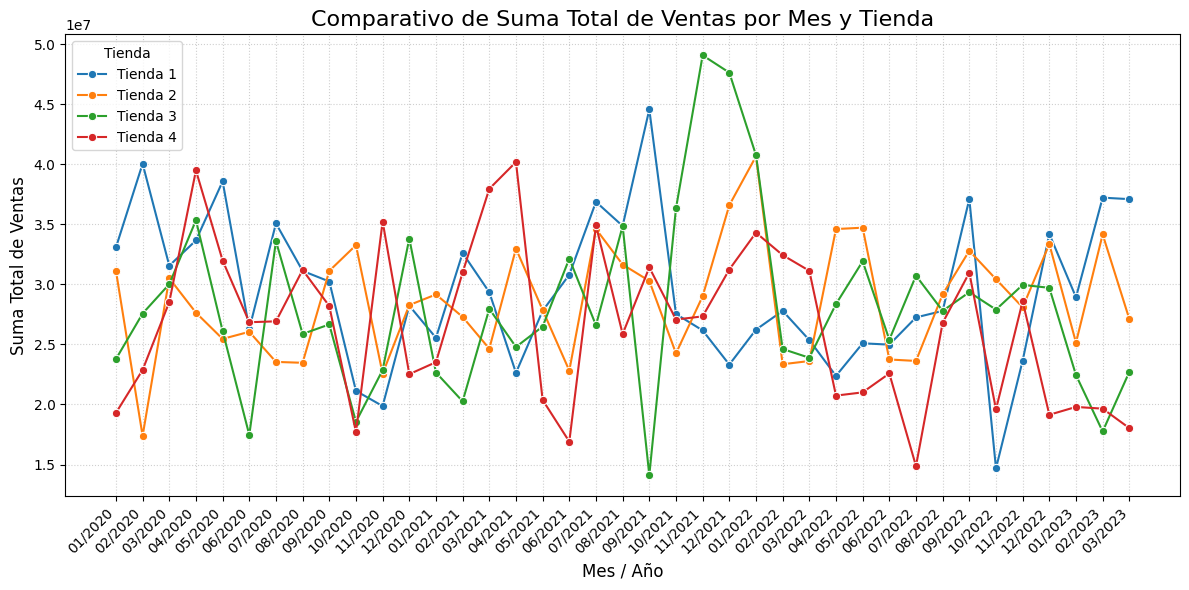

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nota: Debes tener cargados tus DataFrames: tienda, tienda2, tienda3, tienda4.
# Si tu DF original se llama 'tienda4', ajusta las variables para incluir las otras 3.

# -----------------------------------------------------------
# 1. FUNCIÓN DE PROCESAMIENTO
# -----------------------------------------------------------

def preparar_df_ventas(df, nombre_tienda):
    """
    Limpia, agrupa y ordena cronológicamente un DataFrame de ventas.
    """
    # 1. Limpieza y Creación de Fechas
    # Convertir 'Precio' a numérico (asumiendo que es la columna de ventas)
    df['Precio_Numerico'] = pd.to_numeric(df['Precio'], errors='coerce')

    # Convertir la columna de fecha a datetime (dd/mm/yyyy)
    df['Fecha_dt'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')

    # ---> LÍNEA CRÍTICA CORREGIDA: CREAR 'Mes_Anio' ANTES DEL GROUPBY <---
    df['Mes_Anio'] = df['Fecha_dt'].dt.strftime('%m/%Y')

    # 2. Agrupación y Suma
    # Ahora 'Mes_Anio' existe y puede ser usada como clave de agrupación
    df_agrupado = df.groupby('Mes_Anio', as_index=False).agg(
        Suma_Total_Ventas=('Precio_Numerico', 'sum'),
        # Necesitamos la fecha mínima para ordenar después
        Fecha_Minima=('Fecha_dt', 'min')
    )

    # 3. Ordenamiento y Etiquetado
    df_agrupado = df_agrupado.sort_values(by='Fecha_Minima', ascending=True)

    # Eliminar la columna de ayuda y añadir el identificador de tienda
    df_agrupado = df_agrupado.drop(columns=['Fecha_Minima'])
    df_agrupado['Tienda'] = nombre_tienda

    return df_agrupado
# -----------------------------------------------------------
# 2. APLICAR LA FUNCIÓN Y CONSOLIDAR DATOS
# -----------------------------------------------------------

# Lista de DataFrames y sus nombres para iterar fácilmente
dfs_a_procesar = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

lista_resultados = []

for nombre, df in dfs_a_procesar.items():
    df_procesado = preparar_df_ventas(df.copy(), nombre) # Usar .copy() para evitar SettingWithCopyWarning
    lista_resultados.append(df_procesado)

# Concatenar todos los DataFrames procesados en uno solo
df_comparativo = pd.concat(lista_resultados, ignore_index=True)

# -----------------------------------------------------------
# 3. GENERAR EL GRÁFICO COMPARATIVO
# -----------------------------------------------------------

plt.figure(figsize=(12, 6))

# Usamos seaborn (sns) para generar el gráfico de línea, usando 'Tienda' para el color (hue)
sns.lineplot(
    data=df_comparativo,
    x='Mes_Anio',
    y='Suma_Total_Ventas',
    hue='Tienda', # Clave para diferenciar las 4 líneas
    marker='o'
)

plt.title('Comparativo de Suma Total de Ventas por Mes y Tienda', fontsize=16)
plt.xlabel('Mes / Año', fontsize=12)
plt.ylabel('Suma Total de Ventas', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
plt.legend(title='Tienda', loc='upper left')
plt.tight_layout()
plt.show()

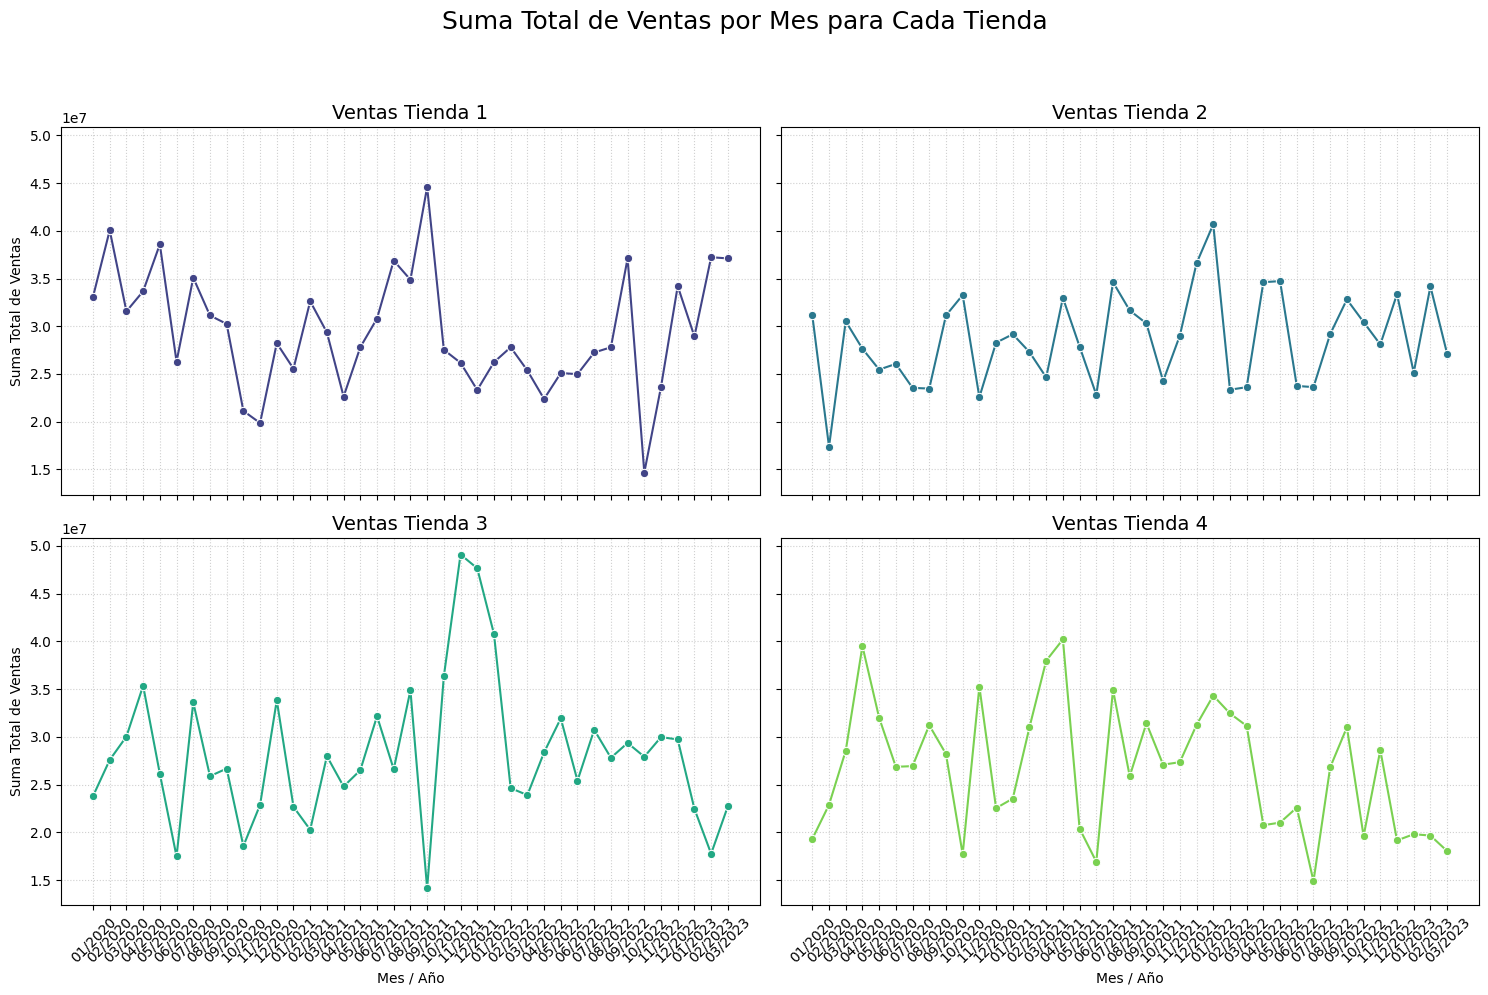

In [10]:
# Asumo que tus DataFrames tienda, tienda2, tienda3, tienda4 están cargados
# Si no lo están, asegúrate de cargarlos antes de ejecutar este código.

# -----------------------------------------------------------
# 1. FUNCIÓN DE PROCESAMIENTO (LA MISMA QUE YA CORREGIMOS)
# -----------------------------------------------------------

def preparar_df_ventas(df, nombre_tienda):
    """
    Limpia, agrupa y ordena cronológicamente un DataFrame de ventas.
    """
    df['Precio_Numerico'] = pd.to_numeric(df['Precio'], errors='coerce')
    df['Fecha_dt'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
    df['Mes_Anio'] = df['Fecha_dt'].dt.strftime('%m/%Y') # Asegura que Mes_Anio exista antes del groupby

    df_agrupado = df.groupby('Mes_Anio', as_index=False).agg(
        Suma_Total_Ventas=('Precio_Numerico', 'sum'),
        Fecha_Minima=('Fecha_dt', 'min')
    )

    df_agrupado = df_agrupado.sort_values(by='Fecha_Minima', ascending=True)
    df_agrupado = df_agrupado.drop(columns=['Fecha_Minima'])
    df_agrupado['Tienda'] = nombre_tienda

    return df_agrupado

# -----------------------------------------------------------
# 2. APLICAR LA FUNCIÓN Y CONSOLIDAR DATOS (opcional aquí, pero útil)
# -----------------------------------------------------------

dfs_a_procesar = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Diccionario para almacenar los DataFrames procesados de cada tienda
resultados_por_tienda = {}

for nombre, df in dfs_a_procesar.items():
    df_procesado = preparar_df_ventas(df.copy(), nombre)
    resultados_por_tienda[nombre] = df_procesado

# -----------------------------------------------------------
# 3. GENERAR LOS 4 GRÁFICOS INDIVIDUALES (Subplots)
# -----------------------------------------------------------

# Crear una figura y un conjunto de 4 subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
# sharex=True y sharey=True hacen que los ejes X e Y compartan los mismos límites,
# lo que es bueno para comparar escalas visualmente.
axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

fig.suptitle('Suma Total de Ventas por Mes para Cada Tienda', fontsize=18, y=1.02) # Título general de la figura

for i, (nombre_tienda, df_tienda) in enumerate(resultados_por_tienda.items()):
    ax = axes[i] # Seleccionar el subplot actual

    sns.lineplot(
        data=df_tienda,
        x='Mes_Anio',
        y='Suma_Total_Ventas',
        marker='o',
        ax=ax, # Especificar en qué subplot dibujar
        color=sns.color_palette("viridis", len(dfs_a_procesar))[i] # Asignar un color único
    )

    ax.set_title(f'Ventas {nombre_tienda}', fontsize=14)
    ax.set_xlabel('Mes / Año', fontsize=10)
    ax.set_ylabel('Suma Total de Ventas', fontsize=10)
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.tick_params(axis='x', rotation=45) # Rotar etiquetas del eje X

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar layout para evitar superposiciones, dejando espacio para el suptitle
plt.show()

Claramenta la tienda 1 tiene mas ventas en terminos de ingresos, pero aun no es un dato definitivo para tomar decisiones.

# 2. Ventas por categoría

In [46]:
ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum(numeric_only=True)
ventas_por_categoria

,Precio
Categoría del Producto,
Artículos para el hogar,12698400.0
Deportes y diversión,39290000.0
Electrodomésticos,363685200.0
Electrónicos,429493500.0
Instrumentos musicales,91299000.0
Juguetes,17995700.0
Libros,8784900.0
Muebles,187633700.0


<Axes: xlabel='Tipo Inmueble', ylabel='Porcentaje'>

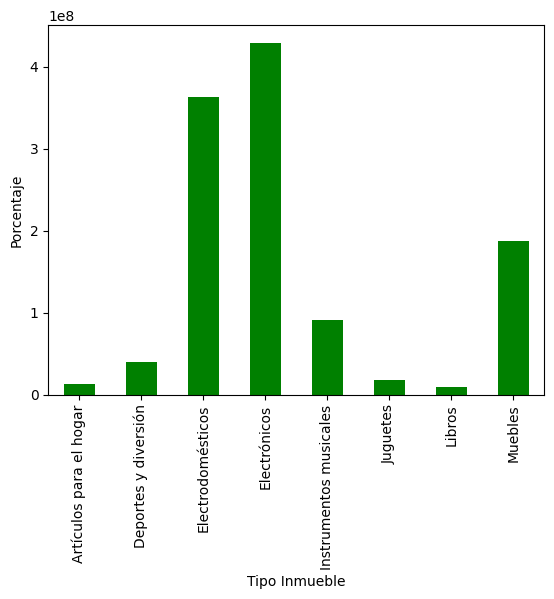

In [48]:
ventas_por_categoria.plot(kind="bar", color='green', xlabel="Tipo Inmueble", ylabel="Porcentaje")

Text(0.5, 0.98, 'Ventas por Categoria')

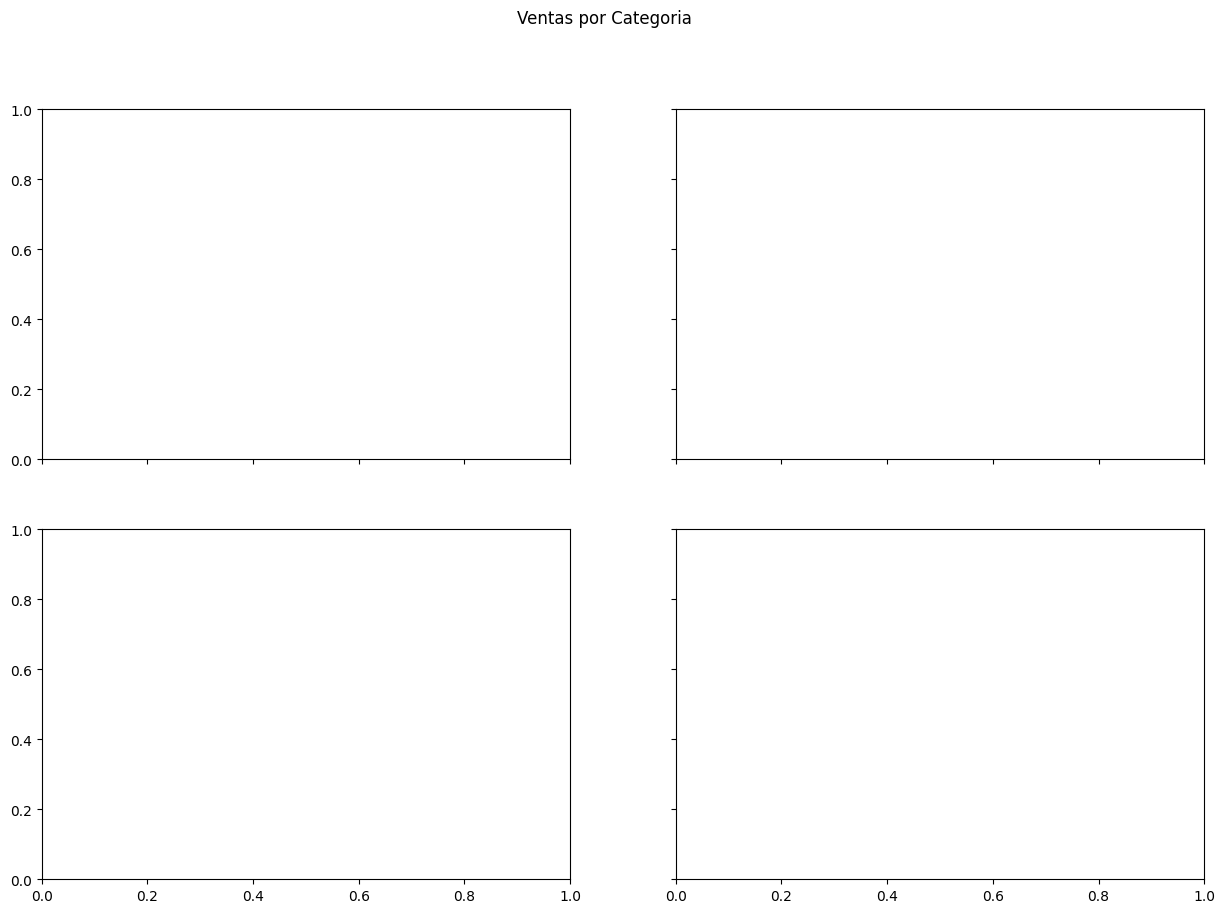

In [58]:
def preparar_datos_por_categoria(df):
  ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum(numeric_only=True)
  return ventas_por_categoria

dfs_a_procesar = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

fig.suptitle("Ventas por Categoria") #Título de la figura

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda